In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import wrangle as w

import matplotlib.pyplot as plt

import unicodedata
import nltk
from wordcloud import WordCloud
import os
import json
import acquire as a 

In [4]:
target_variable
train, validate, test = w.split_data(df, target_variable)

In [5]:
train

,repo,language,readme_contents,clean,stemmed,lemmatized
70,inkling/Subliminal,Objective-C,"<p align=""center"" >\n <img src=""http://inklin...",p aligncenter img srchttpinklinggithubiosublim...,p aligncent img srchttpinklinggithubiosublimin...,p aligncenter img srchttpinklinggithubiosublim...
59,microsoftarchive/android-sliding-layer-lib,Java,6Wunderkinder SlidingLayer for Android\n======...,6wunderkinder slidinglayer android repository ...,6wunderkind slidinglay android repositori host...,6wunderkinder slidinglayer android repository ...
92,jamesob/tinychain,Python,"# ⛼ tinychain\n\n*Putting the rough in ""[roug...",tinychain putting rough rough consensushttpsto...,tinychain put rough rough consensushttpstoolsi...,tinychain putting rough rough consensushttpsto...
104,Cleveroad/CRNetworkButton,Swift,# CRNetworkButton [![Awesome](https://cdn.rawg...,crnetworkbutton awesomehttpscdnrawgitcomsindre...,crnetworkbutton awesomehttpscdnrawgitcomsindre...,crnetworkbutton awesomehttpscdnrawgitcomsindre...
97,zhangxinxu/mobilebone,JavaScript,"mobilebone.js\n=============\n\n<img src=""http...",mobilebonejs img srchttpswwwzhangxinxucomgithu...,mobilebonej img srchttpswwwzhangxinxucomgithub...,mobilebonejs img srchttpswwwzhangxinxucomgithu...
...,...,...,...,...,...,...
81,Zewo/Venice,Swift,"<p align=""center"">\n<img src=""https://github.c...",p aligncenter img srchttpsgithubcomzewoveniceb...,p aligncent img srchttpsgithubcomzewoveniceblo...,p aligncenter img srchttpsgithubcomzewoveniceb...
12,boctor/idev-recipes,Objective-C,#### [iDevRecipes](http://idevrecipes.com/)\ni...,idevrecipeshttpidevrecipescom ios developers s...,idevrecipeshttpidevrecipescom io develop somet...,idevrecipeshttpidevrecipescom io developer som...
83,csswizardry/csswizardry-grids,other,"# csswizardry-grids\n\n**Simple, fluid, nestab...",csswizardrygrids simple fluid nestable flexibl...,csswizardrygrid simpl fluid nestabl flexibl sa...,csswizardrygrids simple fluid nestable flexibl...
10,shu223/iOS-9-Sampler,Swift,# iOS-9-Sampler\n\n[![Platform](http://img.shi...,ios9sampler platformhttpimgshieldsiobadgeplatf...,ios9sampl platformhttpimgshieldsiobadgeplatfor...,ios9sampler platformhttpimgshieldsiobadgeplatf...


In [15]:
# split the words individually up                                                                                                                                                                                                                                                                                                              
git_words =" ".join(train.clean).split(" ")

words_freq = pd.Series(git_words).value_counts()

# split the words individually up                                                                                                                                                                                                                                                                                                             
git_lem_words =" ".join(train.lemmatized).split(" ")

lem_freq = pd.Series(git_lem_words).value_counts()

In [1]:
# create df of freq words
word_counts = pd.concat([lem_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ["lemmatize"]

word_counts.head()

NameError: name 'pd' is not defined

In [29]:
train.language.unique()

array(['Objective-C', 'Java', 'Python', 'Swift', 'JavaScript', 'Ruby',
       'other'], dtype=object)

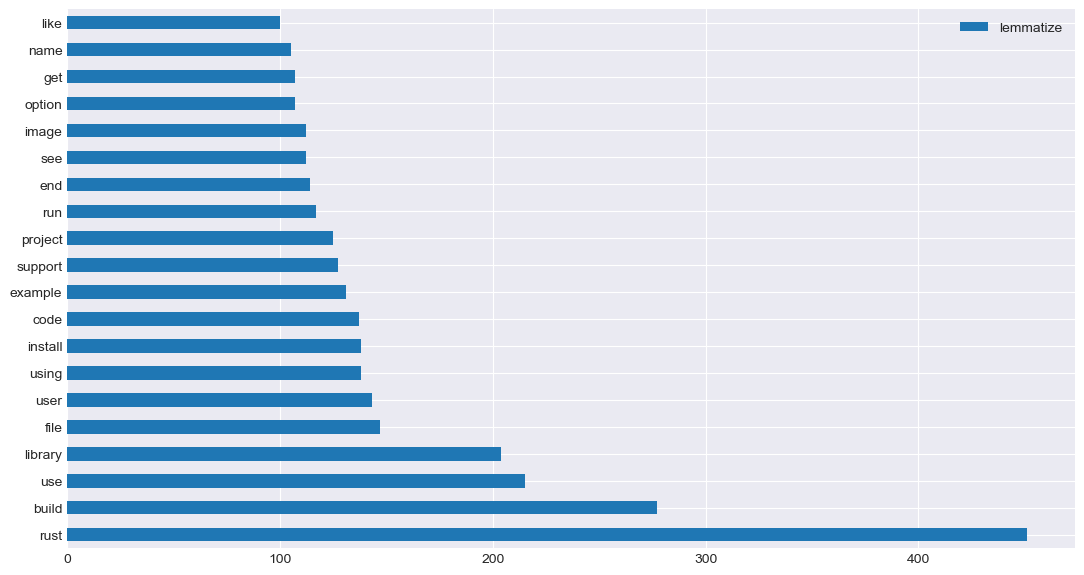

In [17]:
# most common 
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')
word_counts.sort_values(["lemmatize"], ascending=False).head(20).plot.barh();


# Are there bigrams or n-grams that can uniquely identify a programming language?

In [18]:
def make_ngram(words, n):
    return pd.Series(nltk.ngrams(words, n)).value_counts(ascending=False)
    

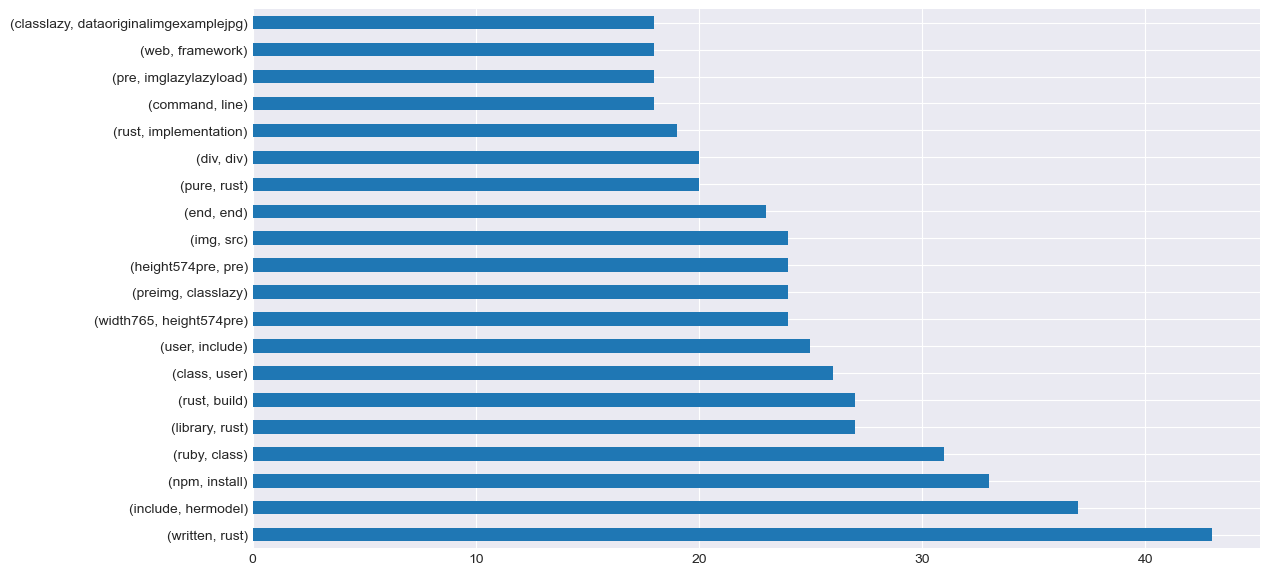

In [19]:
make_ngram(git_lem_words, 2).head(20).plot.barh();

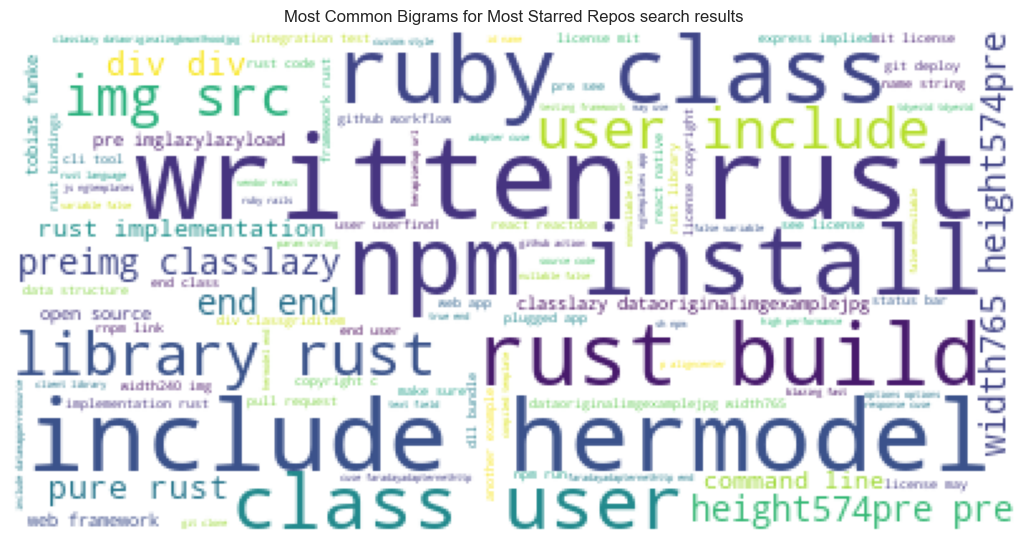

In [20]:
img = WordCloud(background_color="white", collocation_threshold = 2).generate(" ".join(git_words))

plt.imshow(img)
plt.axis("off")
plt.title("Most Common Bigrams for Most Starred Repos search results");

In [21]:
df.language.unique()

array(['Java', 'JavaScript', 'other', 'Swift', 'Python', 'Objective-C',
       'Ruby'], dtype=object)

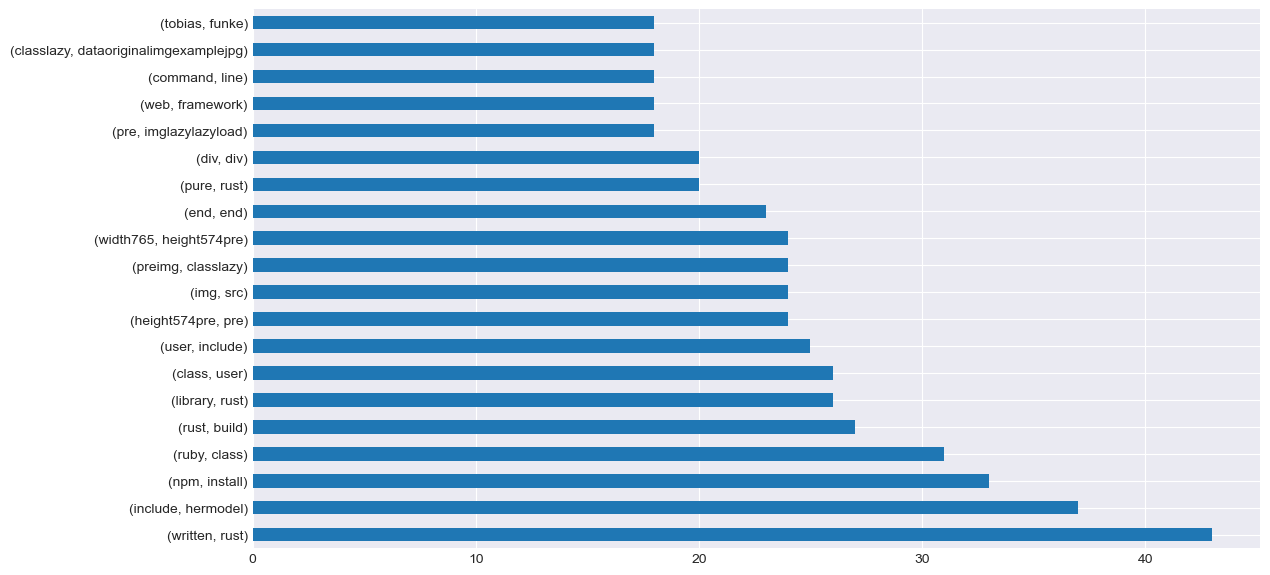

In [22]:
make_ngram(git_words, 2).head(20).plot.barh();

* `pure, rust`, `rust, build` is a library for C language, which leads me to objective-c
* `install npm` npm is a package manager for the JavaScript programming language
* `library ruby` ruby is a language 

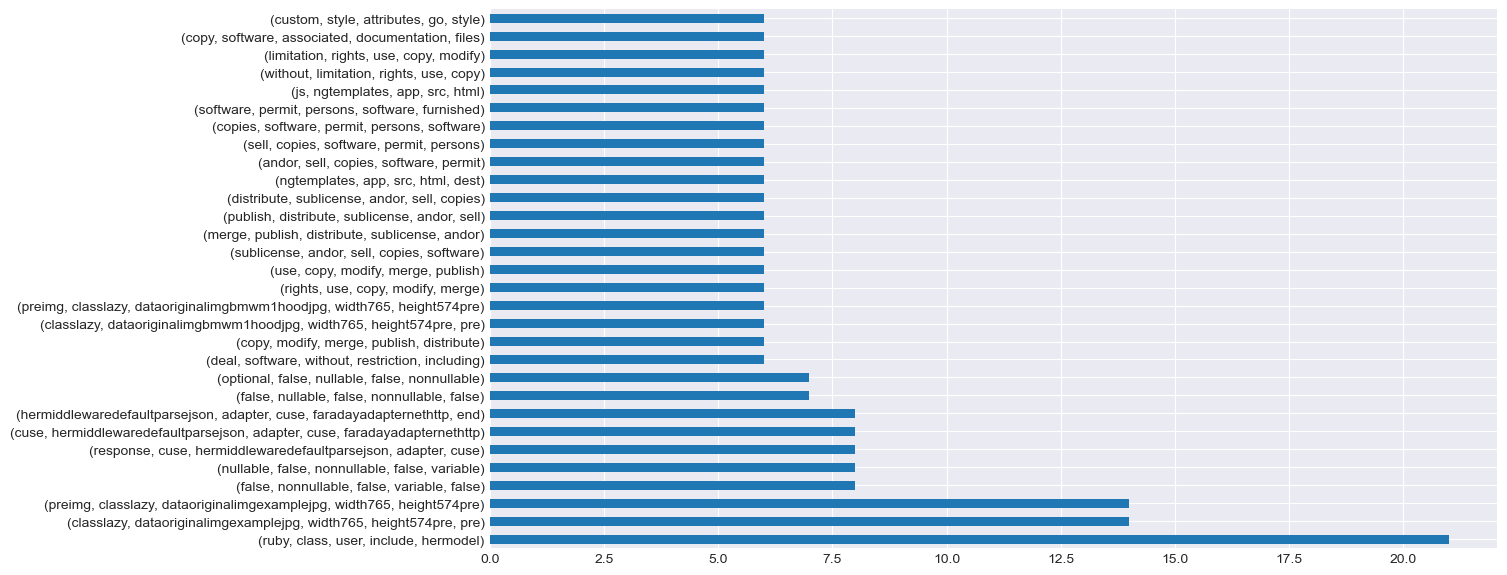

In [27]:
make_ngram(git_words, 5).head(30).plot.barh();

# Are there any words that uniquely identify a programming language?

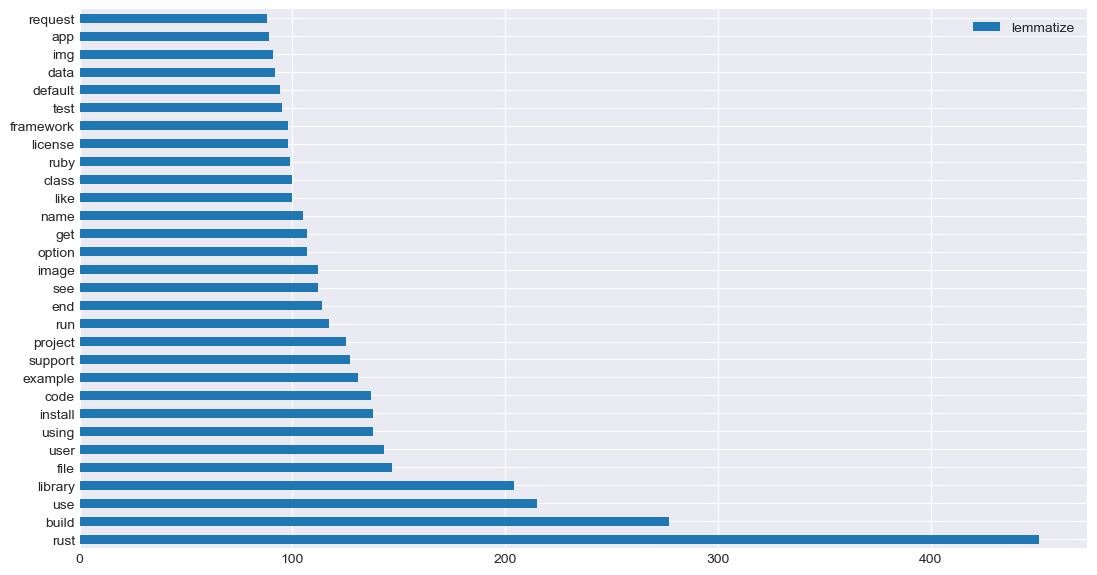

In [25]:
word_counts.sort_values("lemmatize", ascending=False)[["lemmatize"]].head(30).plot.barh();

In [ ]:
* `rust` library for C
* `ruby` ruby is a language